This work is licensed under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

# Classes and functions

Now that we know how to create new types, the next step is to write functions that take
programmer-defined objects as parameters and return them as results. In this chapter I
also present “functional programming style” and two new program development plans.

Code examples from this chapter are available from http://thinkpython2.com/code/
Time1.py. Solutions to the exercises are at http://thinkpython2.com/code/Time1_soln.py.


### 16.1 Time

As another example of a programmer-defined type, we’ll define a class called Time that
records the time of day. The class definition looks like this:

In [ ]:
class Time:
    """Represents the time of day.
    attributes: hour, minute, second
    """

We can create a new Time object and assign attributes for hours, minutes, and seconds:

In [ ]:
time = Time()
time.hour = 11
time.minute = 59
time.second = 30

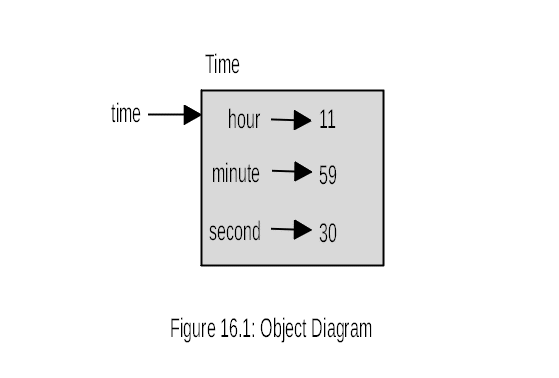
The state diagram for the Time object looks like Figure 16.1.

As an exercise, write a function called print_time that takes a Time object and prints it in
the form hour:minute:second. Hint: the format sequence '%.2d' prints an integer using
at least two digits, including a leading zero if necessary.

Write a boolean function called is_after that takes two Time objects, t1 and t2, and returns
True if t1 follows t2 chronologically and False otherwise. Challenge: don’t use an
if statement.

### 16.2 Pure functions

In the next few sections, we’ll write two functions that add time values. They demonstrate
two kinds of functions: pure functions and modifiers. They also demonstrate a development
plan I’ll call **prototype and patch**, which is a way of tackling a complex problem by
starting with a simple prototype and incrementally dealing with the complications.
Here is a simple prototype of add_time:

In [ ]:
def add_time(t1, t2):
    sum = Time()
    sum.hour = t1.hour + t2.hour
    sum.minute = t1.minute + t2.minute
    sum.second = t1.second + t2.second
    return sum

The function creates a new Time object, initializes its attributes, and returns a reference to
the new object. This is called a **pure function** because it does not modify any of the objects
passed to it as arguments and it has no effect, like displaying a value or getting user input,
other than returning a value.

To test this function, I’ll create two Time objects: start contains the start time of a movie,
like Monty Python and the Holy Grail, and duration contains the run time of the movie,
which is one hour 35 minutes.

add_time figures out when the movie will be done.

In [ ]:
start = Time()
start.hour = 9
start.minute = 45
start.second = 0

duration = Time()
duration.hour = 1
duration.minute = 35
duration.second = 0

done = add_time(start, duration)
print_time(done)

The result, 10:80:00 might not be what you were hoping for. The problem is that this
function does not deal with cases where the number of seconds or minutes adds up to
more than sixty. When that happens, we have to “carry” the extra seconds into the minute
column or the extra minutes into the hour column.

Here’s an improved version:

In [ ]:
def add_time(t1, t2):
    sum = Time()
    sum.hour = t1.hour + t2.hour
    sum.minute = t1.minute + t2.minute
    sum.second = t1.second + t2.second

    if sum.second >= 60:
        sum.second -= 60
        sum.minute += 1

    if sum.minute >= 60:
        sum.minute -= 60
        sum.hour += 1

    return sum

Although this function is correct, it is starting to get big. We will see a shorter alternative
later. Rerun the cell that calls the add_time function to verify that it works.


### 16.3 Modifiers

Sometimes it is useful for a function to modify the objects it gets as parameters. In that case,
the changes are visible to the caller. Functions that work this way are called **modifiers**.

increment, which adds a given number of seconds to a Time object, can be written naturally
as a modifier. Here is a rough draft:

In [ ]:
def increment(time, seconds):
    time.second += seconds
    
    if time.second >= 60:
        time.second -= 60
        time.minute += 1
        
    if time.minute >= 60:
        time.minute -= 60
        time.hour += 1

The first line performs the basic operation; the remainder deals with the special cases we
saw before.

Is this function correct? What happens if seconds is much greater than sixty?

In that case, it is not enough to carry once; we have to keep doing it until time.second is
less than sixty. One solution is to replace the if statements with while statements. That
would make the function correct, but not very efficient. As an exercise, write a correct
version of increment that doesn’t contain any loops.

Anything that can be done with modifiers can also be done with pure functions. In fact,
some programming languages only allow pure functions. There is some evidence that
programs that use pure functions are faster to develop and less error-prone than programs
that use modifiers. But modifiers are convenient at times, and functional programs tend to
be less efficient.

In general, I recommend that you write pure functions whenever it is reasonable and resort
to modifiers only if there is a compelling advantage. This approach might be called a
**functional programming style**.

As an exercise, write a “pure” version of increment that creates and returns a new Time
object rather than modifying the parameter.

### 16.4 Prototyping versus planning

The development plan I am demonstrating is called “prototype and patch”. For each function,
I wrote a prototype that performed the basic calculation and then tested it, patching
errors along the way.

This approach can be effective, especially if you don’t yet have a deep understanding
of the problem. But incremental corrections can generate code that is unnecessarily
complicated—since it deals with many special cases—and unreliable—since it is hard to
know if you have found all the errors.

An alternative is **designed development**, in which high-level insight into the problem can
make the programming much easier. In this case, the insight is that a Time object is really
a three-digit number in base 60 (see http://en.wikipedia.org/wiki/Sexagesimal .)! The
second attribute is the “ones column”, the minute attribute is the “sixties column”, and the
hour attribute is the “thirty-six hundreds column”.

When we wrote add_time and increment, we were effectively doing addition in base 60,
which is why we had to carry from one column to the next.

This observation suggests another approach to the whole problem—we can convert Time
objects to integers and take advantage of the fact that the computer knows how to do
integer arithmetic.

Here is a function that converts Times to integers:

In [ ]:
def time_to_int(time):
    minutes = time.hour * 60 + time.minute
    seconds = minutes * 60 + time.second
    return seconds

And here is a function that converts an integer to a Time (recall that divmod divides the first
argument by the second and returns the quotient and remainder as a tuple).

In [ ]:
def int_to_time(seconds):
    time = Time()
    minutes, time.second = divmod(seconds, 60)
    time.hour, time.minute = divmod(minutes, 60)
    return time

You might have to think a bit, and run some tests, to convince yourself that these functions
are correct. One way to test them is to check that time_to_int(int_to_time(x)) == x for
many values of x. This is an example of a consistency check.

Once you are convinced they are correct, you can use them to rewrite add_time:

In [ ]:
def add_time(t1, t2):
    seconds = time_to_int(t1) + time_to_int(t2)
    return int_to_time(seconds)

This version is shorter than the original, and easier to verify. As an exercise, rewrite
increment using time_to_int and int_to_time.

Also write test code for all the new functions in the next cell

In some ways, converting from base 60 to base 10 and back is harder than just dealing with
times. Base conversion is more abstract; our intuition for dealing with time values is better.

But if we have the insight to treat times as base 60 numbers and make the investment of
writing the conversion functions (time_to_int and int_to_time), we get a program that
is shorter, easier to read and debug, and more reliable.

It is also easier to add features later. For example, imagine subtracting two Times to find
the duration between them. The naive approach would be to implement subtraction with
borrowing. Using the conversion functions would be easier and more likely to be correct.

Ironically, sometimes making a problem harder (or more general) makes it easier (because
there are fewer special cases and fewer opportunities for error).


### 16.5 Debugging

A Time object is well-formed if the values of minute and second are between 0 and 60
(including 0 but not 60) and if hour is positive. hour and minute should be integral values,
but we might allow second to have a fraction part.

Requirements like these are called **invariants** because they should always be true. To put
it a different way, if they are not true, something has gone wrong.

Writing code to check invariants can help detect errors and find their causes. For example,
you might have a function like valid_time that takes a Time object and returns False if it
violates an invariant:

In [ ]:
def valid_time(time):
    if time.hour < 0 or time.minute < 0 or time.second < 0:
        return False
    if time.minute >= 60 or time.second >= 60:
        return False
    return True

At the beginning of each function you could check the arguments to make sure they are
valid:

In [ ]:
def add_time(t1, t2):
    if not valid_time(t1) or not valid_time(t2):
        raise ValueError('invalid Time object in add_time')
    seconds = time_to_int(t1) + time_to_int(t2)
    return int_to_time(seconds)

Or you could use an assert statement, which checks a given invariant and raises an exception
if it fails:

In [ ]:
def add_time(t1, t2):
    assert valid_time(t1) and valid_time(t2)
    seconds = time_to_int(t1) + time_to_int(t2)
    return int_to_time(seconds)

assert statements are useful because they distinguish code that deals with normal conditions
from code that checks for errors.


### 16.6 Glossary

**prototype and patch:** A development plan that involves writing a rough draft of a program,
testing, and correcting errors as they are found.

**designed development:** A development plan that involves high-level insight into the
problem and more planning than incremental development or prototype development.

**pure function:** A function that does not modify any of the objects it receives as arguments.
Most pure functions are fruitful.

**modifier:** A function that changes one or more of the objects it receives as arguments. Most
modifiers are void; that is, they return None.

**functional programming style:** A style of program design in which the majority of functions
are pure.

**invariant:** A condition that should always be true during the execution of a program.

**assert statement:** A statement that check a condition and raises an exception if it fails.


### 16.7 Exercises

Code examples from this chapter are available from http://thinkpython2.com/code/
Time1.py; solutions to the exercises are available from http://thinkpython2.com/code/
Time1_soln.py.

#### Exercise 16.1. 
Write a function called mul_time that takes a Time object and a number and returns
a new Time object that contains the product of the original Time and the number.

Then use mul_time to write a function that takes a Time object that represents the finishing time
in a race, and a number that represents the distance, and returns a Time object that represents the
average pace (time per mile).

#### Exercise 16.2. 
The datetime module provides time objects that are similar to the Time objects
in this chapter, but they provide a rich set of methods and operators. Read the documentation at
http://docs.python.org/3/library/datetime.html .

1. Use the datetime module to write a program that gets the current date and prints the day of
the week.<br><br>
2. Write a program that takes a birthday as input and prints the user’s age and the number of
days, hours, minutes and seconds until their next birthday.<br><br>
3. For two people born on different days, there is a day when one is twice as old as the other.
That’s their Double Day. Write a program that takes two birthdays and computes their Double
Day.<br><br>
4. For a little more challenge, write the more general version that computes the day when one
person is n times older than the other.

Solution: http://thinkpython2.com/code/double.py

Source material from:

Think Python<br>
How to Think Like a Computer Scientist<br>
2nd Edition, Version 2.2.23<br>
Allen Downey<br>
Copyright © 2015 Allen Downey. <br>
<br>
Source material used under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.


Adapted to Jupyter Notebooks with additional material by Warren Watts, Copyright © 2018